### Exploratory data analysis of TMED dataset, opening the image files

In [1]:
import pandas as pd
import numpy as np
import os
import random
import PIL.Image as Image
from matplotlib import pyplot as plt
import re

In [2]:
def LoadImage(file_path):
    im = Image.open(file_path)
    im = np.asarray(im)/255
    return im

In [3]:
def ShowGrayscaleImage(file_path, title='', ax=None):
    
    im = LoadImage(file_path)
    if ax is None:
        plt.figure()
    plt.axis('off')
    
    plt.imshow(im , cmap=plt.cm.gray, vmin=0, vmax=1) #im is of float, 0-1

    plt.title(title)

In [27]:
# create a dataframe from the DEV478 split
dataset_root = "/workspace/datasets/TMED/approved_users_only"
folds = [f'TMED2_fold{i}_labeledpart.csv' for i in range(3)]
print(folds)
csv_files = [os.path.join(dataset_root, "DEV479", f) for f in folds]
print(csv_files)

['TMED2_fold0_labeledpart.csv', 'TMED2_fold1_labeledpart.csv', 'TMED2_fold2_labeledpart.csv']
['/workspace/datasets/TMED/approved_users_only/DEV479/TMED2_fold0_labeledpart.csv', '/workspace/datasets/TMED/approved_users_only/DEV479/TMED2_fold1_labeledpart.csv', '/workspace/datasets/TMED/approved_users_only/DEV479/TMED2_fold2_labeledpart.csv']


### Investigate the labeled set

In [8]:
# load dataframe for each part
dfs = [pd.read_csv(c) for c in csv_files]
dfs[0]

,query_key,view_classifier_split,diagnosis_classifier_split,view_label,diagnosis_label,SourceFolder
0,4860s1_0.png,train,train,A4C,moderate_AS,view_and_diagnosis_labeled_set/labeled
1,4860s1_1.png,train,train,A2C,moderate_AS,view_and_diagnosis_labeled_set/labeled
2,4860s1_2.png,train,train,PLAX,moderate_AS,view_and_diagnosis_labeled_set/labeled
3,4860s1_3.png,train,train,PLAX,moderate_AS,view_and_diagnosis_labeled_set/labeled
4,4860s1_4.png,train,train,PLAX,moderate_AS,view_and_diagnosis_labeled_set/labeled
...,...,...,...,...,...,...
24959,2797s1_28.png,train,not_used,A4C,Not_Provided,view_labeled_set/labeled
24960,235s1_0.png,train,not_used,PLAX,Not_Provided,view_labeled_set/labeled
24961,235s1_1.png,train,not_used,A4C,Not_Provided,view_labeled_set/labeled
24962,235s1_2.png,train,not_used,PLAX,Not_Provided,view_labeled_set/labeled


In [9]:
def studyinfo_from_query_key(s):
    # Define the regular expression pattern
    pattern = r'(\d+)s(\d+)_(\d+)\.png'
    
    # Use re.match to search for the pattern in the string
    match = re.match(pattern, s)
    
    # If a match is found, extract the groups and return them as a tuple
    if match:
        ID, studyNum, imageNum = match.groups()
        return int(ID), int(studyNum), int(imageNum)
    else:
        return None

In [10]:
# combine the three splits into a big dataset
df = pd.concat(dfs).reset_index()
df

,index,query_key,view_classifier_split,diagnosis_classifier_split,view_label,diagnosis_label,SourceFolder
0,0,4860s1_0.png,train,train,A4C,moderate_AS,view_and_diagnosis_labeled_set/labeled
1,1,4860s1_1.png,train,train,A2C,moderate_AS,view_and_diagnosis_labeled_set/labeled
2,2,4860s1_2.png,train,train,PLAX,moderate_AS,view_and_diagnosis_labeled_set/labeled
3,3,4860s1_3.png,train,train,PLAX,moderate_AS,view_and_diagnosis_labeled_set/labeled
4,4,4860s1_4.png,train,train,PLAX,moderate_AS,view_and_diagnosis_labeled_set/labeled
...,...,...,...,...,...,...,...
74887,24959,2797s1_28.png,train,not_used,A4C,Not_Provided,view_labeled_set/labeled
74888,24960,235s1_0.png,train,not_used,PLAX,Not_Provided,view_labeled_set/labeled
74889,24961,235s1_1.png,train,not_used,A4C,Not_Provided,view_labeled_set/labeled
74890,24962,235s1_2.png,train,not_used,PLAX,Not_Provided,view_labeled_set/labeled


In [11]:
# confirm there are no repeating values in the dataset
df['query_key'].value_counts()

query_key
4860s1_0.png     3
1970s1_5.png     3
2542s1_13.png    3
2542s1_12.png    3
2542s1_11.png    3
                ..
5310s1_2.png     3
5310s1_1.png     3
5310s1_0.png     3
29s1_15.png      3
235s1_3.png      3
Name: count, Length: 24964, dtype: int64

In [12]:
# seems like each is used 3 times. check if they are used across different train/test sets
df[df['query_key']=='4860s1_0.png']

,index,query_key,view_classifier_split,diagnosis_classifier_split,view_label,diagnosis_label,SourceFolder
0,0,4860s1_0.png,train,train,A4C,moderate_AS,view_and_diagnosis_labeled_set/labeled
35323,10359,4860s1_0.png,val,val,PLAX,moderate_AS,view_and_diagnosis_labeled_set/labeled
63739,13811,4860s1_0.png,test,test,PLAX,moderate_AS,view_and_diagnosis_labeled_set/labeled


In [13]:
# makes sense. so we only need to use one of them
df = dfs[0]
df

,query_key,view_classifier_split,diagnosis_classifier_split,view_label,diagnosis_label,SourceFolder
0,4860s1_0.png,train,train,A4C,moderate_AS,view_and_diagnosis_labeled_set/labeled
1,4860s1_1.png,train,train,A2C,moderate_AS,view_and_diagnosis_labeled_set/labeled
2,4860s1_2.png,train,train,PLAX,moderate_AS,view_and_diagnosis_labeled_set/labeled
3,4860s1_3.png,train,train,PLAX,moderate_AS,view_and_diagnosis_labeled_set/labeled
4,4860s1_4.png,train,train,PLAX,moderate_AS,view_and_diagnosis_labeled_set/labeled
...,...,...,...,...,...,...
24959,2797s1_28.png,train,not_used,A4C,Not_Provided,view_labeled_set/labeled
24960,235s1_0.png,train,not_used,PLAX,Not_Provided,view_labeled_set/labeled
24961,235s1_1.png,train,not_used,A4C,Not_Provided,view_labeled_set/labeled
24962,235s1_2.png,train,not_used,PLAX,Not_Provided,view_labeled_set/labeled


In [14]:
# what type of values do we expect for each field?
def print_df_value_counts(df):
    cols = df.columns
    for c in cols:
        print(df[c].value_counts())
        print("----")
print_df_value_counts(df)

query_key
4860s1_0.png     1
1970s1_5.png     1
2542s1_13.png    1
2542s1_12.png    1
2542s1_11.png    1
                ..
5310s1_2.png     1
5310s1_1.png     1
5310s1_0.png     1
29s1_15.png      1
235s1_3.png      1
Name: count, Length: 24964, dtype: int64
----
view_classifier_split
train    17760
val       3602
test      3602
Name: count, dtype: int64
----
diagnosis_classifier_split
train       10066
not_used     7694
val          3602
test         3602
Name: count, dtype: int64
----
view_label
PLAX               7372
A4CorA2CorOther    6861
A4C                4565
A2C                3436
PSAX               2730
Name: count, dtype: int64
----
diagnosis_label
Not_Provided    7694
severe_AS       7556
moderate_AS     5905
no_AS           1682
mild_AS         1675
mildtomod_AS     452
Name: count, dtype: int64
----
SourceFolder
view_and_diagnosis_labeled_set/labeled    17270
view_labeled_set/labeled                   7694
Name: count, dtype: int64
----


In [15]:
# remove the data that do not have diagnosis labels and redo
df_filtered = df[df['diagnosis_label']!='Not_Provided']
print_df_value_counts(df_filtered)

query_key
4860s1_0.png     1
3100s1_31.png    1
3100s1_17.png    1
3100s1_18.png    1
3100s1_19.png    1
                ..
3670s1_56.png    1
3670s1_57.png    1
3670s1_58.png    1
318s1_0.png      1
5897s1_20.png    1
Name: count, Length: 17270, dtype: int64
----
view_classifier_split
train    10066
val       3602
test      3602
Name: count, dtype: int64
----
diagnosis_classifier_split
train    10066
val       3602
test      3602
Name: count, dtype: int64
----
view_label
A4CorA2CorOther    6861
PLAX               4808
A4C                2206
PSAX               1725
A2C                1670
Name: count, dtype: int64
----
diagnosis_label
severe_AS       7556
moderate_AS     5905
no_AS           1682
mild_AS         1675
mildtomod_AS     452
Name: count, dtype: int64
----
SourceFolder
view_and_diagnosis_labeled_set/labeled    17270
Name: count, dtype: int64
----


In [16]:
# also try removing non-parasternal views
df_parasternal = df_filtered[(df_filtered['view_label'] == 'PLAX') | (df_filtered['view_label'] == 'PSAX')]
#df_parasternal = df_filtered[df_filtered['view_label'] in ['PLAX', 'PSAX']] 
print_df_value_counts(df_parasternal)

query_key
4860s1_2.png    1
3400s1_6.png    1
3100s1_3.png    1
3100s1_2.png    1
376s1_6.png     1
               ..
3523s2_4.png    1
3523s2_3.png    1
3523s2_2.png    1
3523s2_1.png    1
5897s1_6.png    1
Name: count, Length: 6533, dtype: int64
----
view_classifier_split
train    3846
test     1377
val      1310
Name: count, dtype: int64
----
diagnosis_classifier_split
train    3846
test     1377
val      1310
Name: count, dtype: int64
----
view_label
PLAX    4808
PSAX    1725
Name: count, dtype: int64
----
diagnosis_label
severe_AS       2235
moderate_AS     1910
no_AS           1381
mild_AS          735
mildtomod_AS     272
Name: count, dtype: int64
----
SourceFolder
view_and_diagnosis_labeled_set/labeled    6533
Name: count, dtype: int64
----


In [17]:
def get_filename(row):
    return os.path.join(dataset_root, row['SourceFolder'], row['query_key'])
df_parasternal['filename'] = df_parasternal.apply(get_filename, axis=1)
df_parasternal

/tmp/ipykernel_150/1399063024.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_parasternal['filename'] = df_parasternal.apply(get_filename, axis=1)


,query_key,view_classifier_split,diagnosis_classifier_split,view_label,diagnosis_label,SourceFolder,filename
2,4860s1_2.png,train,train,PLAX,moderate_AS,view_and_diagnosis_labeled_set/labeled,/workspace/datasets/TMED/approved_users_only/v...
3,4860s1_3.png,train,train,PLAX,moderate_AS,view_and_diagnosis_labeled_set/labeled,/workspace/datasets/TMED/approved_users_only/v...
4,4860s1_4.png,train,train,PLAX,moderate_AS,view_and_diagnosis_labeled_set/labeled,/workspace/datasets/TMED/approved_users_only/v...
5,4860s1_5.png,train,train,PLAX,moderate_AS,view_and_diagnosis_labeled_set/labeled,/workspace/datasets/TMED/approved_users_only/v...
6,4860s1_6.png,train,train,PLAX,moderate_AS,view_and_diagnosis_labeled_set/labeled,/workspace/datasets/TMED/approved_users_only/v...
...,...,...,...,...,...,...,...
17251,5897s1_2.png,test,test,PLAX,severe_AS,view_and_diagnosis_labeled_set/labeled,/workspace/datasets/TMED/approved_users_only/v...
17252,5897s1_3.png,test,test,PLAX,severe_AS,view_and_diagnosis_labeled_set/labeled,/workspace/datasets/TMED/approved_users_only/v...
17253,5897s1_4.png,test,test,PLAX,severe_AS,view_and_diagnosis_labeled_set/labeled,/workspace/datasets/TMED/approved_users_only/v...
17254,5897s1_5.png,test,test,PSAX,severe_AS,view_and_diagnosis_labeled_set/labeled,/workspace/datasets/TMED/approved_users_only/v...


(112, 112)

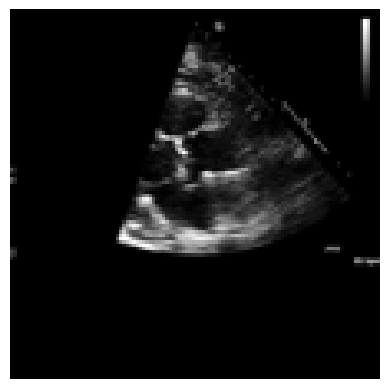

In [18]:
ShowGrayscaleImage(df_parasternal.iloc[0]['filename'])
im = LoadImage(df_parasternal.iloc[0]['filename'])
im.shape

### Try manipulating the image with pytorch transformations

In [23]:
im = Image.open(df_parasternal.iloc[0]['filename'])
im = im.convert("RGB")

In [24]:
import torchvision.transforms as transforms
#tfs = transforms.Compose(
#            [transforms.Resize(size=(self.img_resolution, self.img_resolution)),
#            transforms.ToTensor(), 
#            transforms.Normalize((0.0521,0.0521,0.0521),(0.0104,0.0104,0.0104))
#            ])
tfs = transforms.transforms.ToTensor()
im_tensor = tfs(im)
im1 = im_tensor.numpy()
im2 = transforms.functional.adjust_gamma(im_tensor, gamma=0.5).numpy()

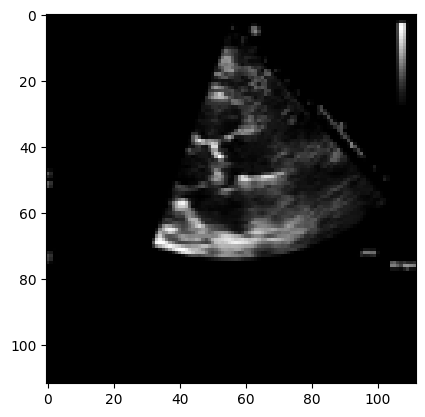

In [25]:
plt.imshow(np.transpose(im1, (1,2,0)))

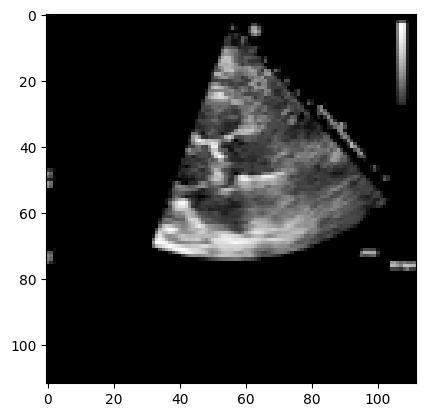

In [26]:
plt.imshow(np.transpose(im2, (1,2,0)))

### Investigate the unlabeled set

In [28]:
unlabeled_csv_file = os.path.join(dataset_root, "TMED2_train_unlabeled.csv")
print(unlabeled_csv_file)

/workspace/datasets/TMED/approved_users_only/TMED2_train_unlabeled.csv


In [30]:
def get_filename_unlabeled(row):
    return os.path.join(dataset_root, 'unlabeled_set', 'unlabeled_set', row['query_key'])

dfu = pd.read_csv(unlabeled_csv_file)
dfu['filename'] = dfu.apply(get_filename_unlabeled, axis=1)
dfu

,query_key,view_classifier_split,diagnosis_classifier_split,view_label,diagnosis_label,SourceFolder,filename
0,3407s1_0.png,unlabeled,not_used,Not_Provided,Not_Provided,unlabeled,/workspace/datasets/TMED/approved_users_only/u...
1,3407s1_1.png,unlabeled,not_used,Not_Provided,Not_Provided,unlabeled,/workspace/datasets/TMED/approved_users_only/u...
2,3407s1_2.png,unlabeled,not_used,Not_Provided,Not_Provided,unlabeled,/workspace/datasets/TMED/approved_users_only/u...
3,3407s1_3.png,unlabeled,not_used,Not_Provided,Not_Provided,unlabeled,/workspace/datasets/TMED/approved_users_only/u...
4,3407s1_4.png,unlabeled,not_used,Not_Provided,Not_Provided,unlabeled,/workspace/datasets/TMED/approved_users_only/u...
...,...,...,...,...,...,...,...
353495,3980s1_89.png,unlabeled,not_used,Not_Provided,Not_Provided,unlabeled,/workspace/datasets/TMED/approved_users_only/u...
353496,5157s1_0.png,unlabeled,not_used,Not_Provided,Not_Provided,unlabeled,/workspace/datasets/TMED/approved_users_only/u...
353497,5157s1_1.png,unlabeled,not_used,Not_Provided,Not_Provided,unlabeled,/workspace/datasets/TMED/approved_users_only/u...
353498,5157s1_2.png,unlabeled,not_used,Not_Provided,Not_Provided,unlabeled,/workspace/datasets/TMED/approved_users_only/u...


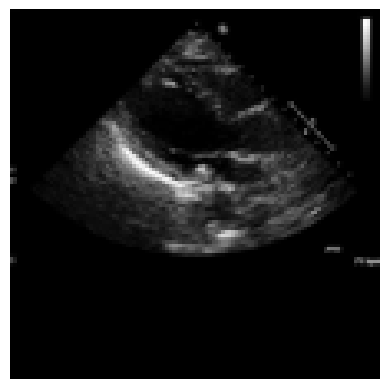

In [36]:
ShowGrayscaleImage(dfu.iloc[0]['filename'])